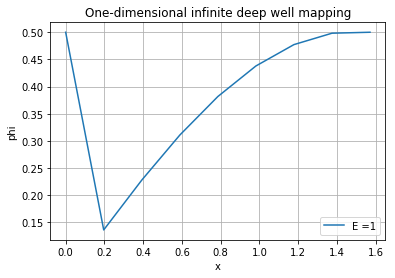

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt

class results:
    x = []
    y = []
    def __init__(self,x,y):
        self.x = x
        self.y = y
"""
@brief: 三角矩阵追赶法
@param: a       the bottom diagonal of magrix
@param: b       the middle diagonal of matrix
@param: c       the top diagonal of matrix
@param: f       coefficient matrix
@return: x      unknown variable
"""   
def TriangleMatrixFun(a,b,c,f): 
    n = len(f)
    d = np.zeros(n)
    d[0] = b[0]
    u = np.zeros(n)
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(0,n-1):
        u[i]=c[i]/d[i]
        d[i+1]=b[i+1]-a[i+1]*u[i]
        
    y[0]= f[0]/d[0]
    
    for i in range(1,n):
        y[i]=(f[i]-a[i]*y[i-1])/d[i]
    
    x[n-1]=y[n-1]
    
    for i in range(n-2,-1,-1):
        x[i]=y[i]-u[i]*x[i+1]
    return x

"""
@brief: 常微分方程边值问题的差分解法
@param: a             初值a
@param: b             初值b
@param: n             区间分段数
@param: alpha         y(a)=alpha
@param: beta          y(b)=beta
@param: px,qx,fx      y''+p(x)y'+q(x)y = f(x)
@return: res          结果包含x和y的对应值
"""
def difference_solve(n,a,b,alpha,beta,px,qx,fx,k):
    h = (b-a)/n
    x = np.arange(a,b+h,h)
    p = []
    q = []
    f = []
    aa = []
    bb = []
    cc = []
    y = []
    y.append(alpha)
    for i in range(0,n-1):
        q.append(qx(x[i],k))
        p.append(px(x[i]))
        f.append(fx(x[i]))
    f[n-2] = -1/h**2 * 1/2
    f[0] = -1/h/(h-1)
    aa.append(0)
    for i in range(1,n-1):
        aa.append(1/(h**2)-1/2/h*p[i])
    for i in range(0,n-2):
        cc.append(1/(h**2)+1/2/h*p[i])
    cc.append(0)
    cc[0]=1/h**2-1/h**2/(h-1)
    for i in range(0,n-1):
        bb.append(-2/(h**2)+q[i])
    y.extend(TriangleMatrixFun(aa,bb,cc,f))
    y.append(beta)
    res = results(x,y)
    return res

def qx(x,i):
    return 1
def px(x):
    return 0
def fx(x):
    return 0

for i in range(1,2):
    res = difference_solve(8,0,math.pi/2,0.5,0.5,px,qx,fx,i)
    plot1=plt.plot(res.x, res.y, label='E ='+str(i))
plt.xlabel('x')
plt.ylabel('phi')
plt.grid(True)
plt.legend(loc=4)
plt.title('One-dimensional infinite deep well mapping')
plt.show() 

